- Sama Samir AlNazer: 20240643
- Aijie Jiang: 20232084
- Raya Daher Al-Khatib: 20241416
- Kin Hang Ma: 20231804

# "Where Should I Live?"
 Leveraging Data to Optimize Quality of Life Choices


## Data Wrangling and Analysis


### 0. Import Dataset

In [1]:
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
city_data=pd.read_csv('city_data.csv', sep='|', header=1)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


#### All Data

In [4]:
#modify the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
city_data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.10,10.2,55770.00,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.30,3.0,66689.00,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.50,10.7,62500.00,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.70,6.2,57595.00,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.80,NaN,53311.00,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
5,"Bruges, Belgium",840.0,119765,74600.0,25.63,5.6,63083.00,0,"Dutch, French",2700,1250,1708,NaN,2023-10-25 00:00:00
6,"Sofia, Bulgaria",272.0,1553106,1043522.0,21.40,2.3,43563.00,0,"Bulgarian, English, Turkish",1300,450,1100,NaN,2024-02-11 00:00:00
7,"Dobrich, Bulgaria",640.0,73895,46359.0,22.85,4.6,10089.92,0,"Bulgarian, Turkish",1200,400,1100,NaN,2023-12-30 00:00:00
8,"Zurich, Switzerland",1058.0,1384728,939270.0,22.30,4.7,80431.00,4,"German, English",6636,3190,4862,NaN,2023-05-06 00:00:00
9,"Geneva, Switzerland",1112.0,597269,404313.0,23.80,9.9,83747.00,1,"French, English",5794,2818,4263,NaN,2024-09-28 00:00:00


### 1. Data Preprocessing


We have to check for the amount of **missing values** in each column of the dataset, and look at the **data types**, so we use `.info()`

In [5]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

First, we have to drop any duplicated rows if there are any 

In [6]:
city_data= city_data.drop_duplicates()

We identified that the column `Average Price Groceries` had only 6 non-null values (~93% missing).

To avoid injecting noise with unreliable imputations, we decided to drop the column entirely before proceeding with the remaining preprocessing steps.


In [7]:
# Drop 'Average Price Groceries' due to excessive missing values (>90%)
if 'Average Price Groceries' in city_data.columns:
    city_data = city_data.drop(columns=['Average Price Groceries'])

# Check the dataset again to review any other missing values in the columns
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 85
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             84 non-null     object 
 1   Population Density               83 non-null     float64
 2   Population                       84 non-null     int64  
 3   Working Age Population           83 non-null     float64
 4   Youth Dependency Ratio           84 non-null     float64
 5   Unemployment Rate                83 non-null     float64
 6   GDP per Capita                   83 non-null     float64
 7   Days of very strong heat stress  84 non-null     int64  
 8   Main Spoken Languages            83 non-null     object 
 9   Average Monthly Salary           84 non-null     int64  
 10  Avgerage Rent Price              84 non-null     int64  
 11  Average Cost of Living           84 non-null     int64  
 12  Last Data Update             

Given that there are still missing values, we inspected them manually. The only missing entry in `Main Spoken Languages` belongs to a German city, so we fill that gap with `"German"` to keep the category informative. 

In [8]:
# Fill missing 'Main Spoken Languages': known German city -> 'German'
german_city_mask = city_data['Main Spoken Languages'].isna() & city_data['City'].str.contains('Germany', case=False, na=False)
city_data.loc[german_city_mask, 'Main Spoken Languages'] = 'German'

Given that there is still missing values, we decided that for the other columns with numeric values, we would impute with the median.

In [9]:
#Filling the remaining numeric columns with the median:
for column in city_data.columns:
    if city_data[column].dtype in ['float64', 'int64'] and city_data[column].isnull().sum() > 0:
        city_data[column] = city_data[column].fillna(city_data[column].median())

In [10]:
#Last checkup of the dataset and making sure no missing values are left
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 85
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             84 non-null     object 
 1   Population Density               84 non-null     float64
 2   Population                       84 non-null     int64  
 3   Working Age Population           84 non-null     float64
 4   Youth Dependency Ratio           84 non-null     float64
 5   Unemployment Rate                84 non-null     float64
 6   GDP per Capita                   84 non-null     float64
 7   Days of very strong heat stress  84 non-null     int64  
 8   Main Spoken Languages            84 non-null     object 
 9   Average Monthly Salary           84 non-null     int64  
 10  Avgerage Rent Price              84 non-null     int64  
 11  Average Cost of Living           84 non-null     int64  
 12  Last Data Update             


### 2.

Now we are going to analyze the data in the dataset.

In [11]:
# Split the City column into name/country, accepting commas, semicolons and periods
split_cols = city_data['City'].str.split(r'[;,.]', n=1, expand=True)

city_data['City_Name'] = split_cols[0].str.strip()
city_data['Country'] = (
    split_cols[1]
    .str.strip()
    .replace('', None)
    .fillna('Unknown')
)

unknown_cities = city_data[city_data['Country'] == 'Unknown']
if not unknown_cities.empty:
    print("Cities with unknown information")
    for city in unknown_cities['City']:
        print(city)

In [12]:
# Inspect the parsed Country column to validate entries
countries_list = sorted(city_data['Country'].unique())
print("All countries captured in the dataset:")
for country in countries_list:
    print(country)

All countries captured in the dataset:
Athens
Austria
Belgium
Bulgaria
Croatia
Cyprus
Czechia
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
Ireland
Italy
Latvia
Luxembourg
Malta
Netherlands
Norway
Poland
Portugal
Romania
Slovak Republic
Slovenia
Spain
Sweden
Switzerland
Turkiye
United Kingdom


#### Data correction note
Athens appears inside the `Country` column, but Athens is a city in Greece. We need to correct that entry.


In [13]:
# Swap the single row where City='Greece' and Country='Athens'
swap_row = city_data[
    city_data['City_Name'].str.strip().eq('Greece') &
    city_data['Country'].str.strip().eq('Athens')
]

if not swap_row.empty:
    idx = swap_row.index[0]
    city_data.at[idx, 'City_Name'] = 'Athens'
    city_data.at[idx, 'Country'] = 'Greece'
    print("Updated 1 row to City='Athens', Country='Greece'.")
else:
    print("No swapped row (City='Greece', Country='Athens') was found.")

Updated 1 row to City='Athens', Country='Greece'.


### a) Which country appears most frequently in the dataset? How many cities are associated with it?

In [14]:
# Use value_counts to find the most frequent country
country_counts = city_data['Country'].value_counts()
most_frequent_country = country_counts.idxmax() #top 1 country index
max_count = country_counts.max() #top 1 country count

print(f"The most frequent country is: {most_frequent_country}")
print(f"The number of cities associated: {max_count}")


The most frequent country is: Germany
The number of cities associated: 10


### b) How many cities are present in total? How many are associated with Greece?

In [15]:
#Now we are going to check how many cities are present in total:
total_cities = len(city_data)
print(f"the total number of cities: {total_cities}")

#Then we are going to check the cities associated with Greece
greek_cities = 0
for country in city_data['Country']:
    if country == 'Greece':
        greek_cities += 1

print(f"cities associated with Greece: {greek_cities}")

the total number of cities: 84
cities associated with Greece: 2


### c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [16]:
# Normalize language strings first
normalized_languages = city_data['Main Spoken Languages']

# 1) Unify delimiters by replacing semicolons with commas
normalized_languages = normalized_languages.str.replace(';', ',', regex=False)

# 2) Split comma-separated strings into lists
normalized_languages = normalized_languages.str.split(',')

# 3) Expand the lists into individual rows
normalized_languages = normalized_languages.explode()

# 4) Strip whitespace and drop empty strings
normalized_languages = normalized_languages.str.strip()
normalized_languages = normalized_languages.replace('', pd.NA).dropna()

# 5) Remove 'Unknown' entries and count occurrences
filtered_languages = normalized_languages[normalized_languages.ne('Unknown')]
language_counts = filtered_languages.value_counts()

least_spoken = language_counts.idxmin() if not language_counts.empty else "None"
top_3 = language_counts.head(3)
print(f"Least spoken language is: '{least_spoken}'")
print("The top 3 most spoken languages:")
i = 1
for language, counts in top_3.items():
    print(f"{i}. {language}: {counts} times")
    i += 1

Least spoken language is: 'Serbian'
The top 3 most spoken languages:
1. English: 46 times
2. German: 15 times
3. Turkish: 10 times


### 3.
a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [17]:
#First, we have to convert the column of [last Date Update] to datetime to be able to evaluate it:
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'])

#then we set out our reference date and find the cities that need updating
April_date = pd.Timestamp('2023-04-01')

cities_needing_update = city_data.loc[
    city_data['Last Data Update'] < April_date,
    'City_Name'
]

if cities_needing_update.empty:
    print("No cities need an update.")
else:
    print("The cities that need an update are:")
    for city in cities_needing_update:
        print(city)

The cities that need an update are:
Basel
Munich
Frankfurt am Main
Lyon
Venice
Gothenburg


### b) How many days ago was the last update? On what day, month, and year did it occur?

In [18]:
# Now we have to find the last update in the dataset, and see how many days ago it was. Along with the day, month, and year of the last update.
last_update = city_data['Last Data Update'].iloc[0]
for i in range(1, len(city_data)):
    if city_data['Last Data Update'].iloc[i] > last_update:
        last_update = city_data['Last Data Update'].iloc[i]

#After finding the last update, we calculate how many days ago it was
today = pd.Timestamp.now()
days_ago = (today - last_update).days

#then we find the day,month,and year of the last update
last_day = last_update.day
last_month = last_update.month
last_year = last_update.year

print(f"The last update was {days_ago} days ago")
print(f"Last update date is: {last_day}/{last_month}/{last_year}")


The last update was 341 days ago
Last update date is: 12/12/2024


### 4.
a) How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest?  
Provide a visual representation.

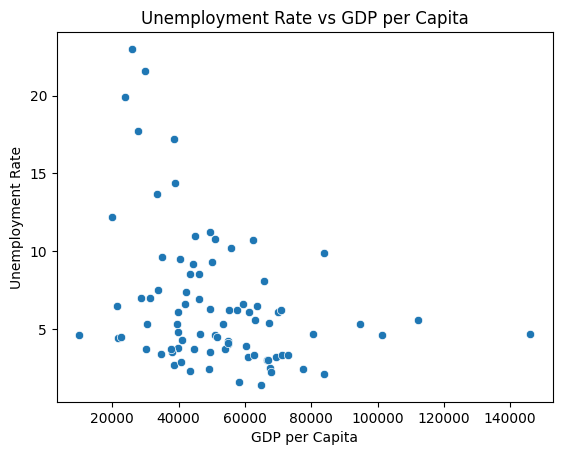

In [19]:
#We want to study the relationship between the Unemployment Rate and GDP per Capita in the dataset, so we decided to do a scatterplot:
sns.scatterplot(x=city_data['GDP per Capita'], y=city_data['Unemployment Rate'])
plt.xlabel('GDP per Capita')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs GDP per Capita')
plt.show()

In [20]:
#Given the scatterplot we analyzed, there is no clear pattern between the GDP and unemployment so they are not strongly related
print("1. There is no strong correlation between GDP and Unemployment Rate\n"
"2. The country's GDP does not determine or affect unemployment")

1. There is no strong correlation between GDP and Unemployment Rate
2. The country's GDP does not determine or affect unemployment


### b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference?  
Show these results with meaningful visualizations.

In [21]:
#Now onto finding the top five cities with the largest difference between the average monthly salary and the average cost of living:
#So we first calculate the difference between the avg. salary and avg. cost of living for each city
differences = []
for i in range(len(city_data)):
    salary = city_data['Average Monthly Salary'].iloc[i]
    cost = city_data['Average Cost of Living'].iloc[i]
    differences.append(salary - cost)

#After that, we find the top 5 cities with the most money left
print("\nThe top 5 cities with most money left are:")

cities_money = []
for i in range(len(city_data)):
    cities_money.append((differences[i], city_data['City_Name'].iloc[i], city_data['Country'].iloc[i]))
cities_money.sort(reverse=True)

for i in range(5):
    money, city, country = cities_money[i]
    print(f"{i+1}. {city}, {country}: {money} euros")


The top 5 cities with most money left are:
1. Basel, Switzerland: 2127 euros
2. Tampere, Finland: 1900 euros
3. Helsinki, Finland: 1850 euros
4. Zurich, Switzerland: 1774 euros
5. Geneva, Switzerland: 1531 euros



The top 5 countries with least money left are:
1. Portugal:-207.5 euros
2. Greece:-125.0 euros
3. Slovak Republic:-50.0 euros
4. Turkiye:-25.0 euros
5. Poland:-16.666666666666668 euros


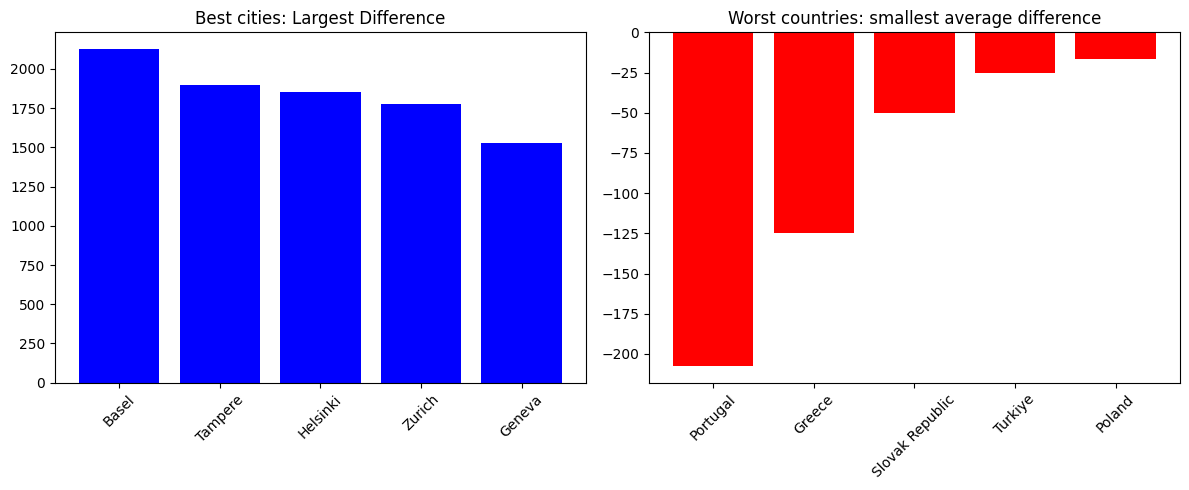

In [22]:
#Now we want to find the opposite, which are the top 5 countries with the smallest average difference
print("\nThe top 5 countries with least money left are:")

#First, we want to calculate the average money left for each country in the dataset
country_money = {}
for i in range(len(city_data)):
    country = city_data['Country'].iloc[i]
    if country not in country_money:
        country_money[country] = []
    country_money[country].append(differences[i])

#Then we calculate the averages and put money in the list for sorting it in ascending order
country_avgs = []
for country, money_list in country_money.items():
    avg_money = sum(money_list) / len(money_list)
    country_avgs.append((avg_money, country))
country_avgs.sort()

#Then we take the first 5 as they are the ones with the smallest average difference
for i in range(5):
    avg_money, country = country_avgs[i]
    print(f"{i+1}. {country}:{avg_money} euros")

#Now to show the results in meaningful visualizations:
#We are going to do two Bar charts, one for the  top 5 cities with the largest difference, and one for the top 5 countries with the smallest average difference:
plt.figure(figsize=(12, 5))

#Bar chart 1: largest difference cities
plt.subplot(1, 2, 1)
best_cities = [cities_money[i][1] for i in range(5)]
best_money = [cities_money[i][0] for i in range(5)]
plt.bar(best_cities, best_money, color='blue')
plt.title('Best cities: Largest Difference')
plt.xticks(rotation=45)

# Bar chart 2: Smallest average difference countries  
plt.subplot(1, 2, 2)
worst_countries = [country_avgs[i][1] for i in range(5)]
worst_money = [country_avgs[i][0] for i in range(5)]
plt.bar(worst_countries, worst_money, color='red')
plt.title('Worst countries: smallest average difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### c) Which is the best city for someone seeking:
- an average monthly salary above €2000,
- a cost of living below or equal to €1600, and
- the lowest unemployment rate possible?

In [23]:
#now we want to find the best cities for specific properties people would be seeking: 
#First, we have to find all cities for someone looking for a salary > €2000 and cost ≤ €1600:
matching_cities = []
for i in range(len(city_data)):
    salary = city_data['Average Monthly Salary'].iloc[i]
    cost = city_data['Average Cost of Living'].iloc[i]
    unemployment = city_data['Unemployment Rate'].iloc[i]
    city_name = city_data['City_Name'].iloc[i]
    country = city_data['Country'].iloc[i]
    if salary > 2000 and cost <= 1600:
        matching_cities.append({'city': city_name,'country':country,'salary':salary,'cost':cost, 'unemployment':unemployment})

#Then, we check if any cities match the specifications
if len(matching_cities) == 0:
    print("No cities found that meet both salary and cost criteria!")
    
#If none are found, we have to show why
    high_salary_cities = []
    low_cost_cities = []
    
    for i in range(len(city_data)):
        salary = city_data['Average Monthly Salary'].iloc[i]
        cost = city_data['Average Cost of Living'].iloc[i]
        city_name = city_data['City_Name'].iloc[i]
        country = city_data['Country'].iloc[i]
        if salary > 2000:
            high_salary_cities.append((city_name, country, salary))
        if cost <= 1600:
            low_cost_cities.append((city_name, country, cost))
    print(f"Cities with salary > €2000: {len(high_salary_cities)}")
    print(f"Cities with cost ≤ €1600: {len(low_cost_cities)}") 
else:
#We have to sort the cities by unemployment rate in ascending order
    def get_unemployment(city):
        return city['unemployment']
    matching_cities.sort(key=get_unemployment)
    
#Therefore, the best city would be the first one in the sorted list
    best_city = matching_cities[0]
    print(f"\nThe best city according to specification is: {best_city['city']} in {best_city['country']}")
    print(f"Its salary is: {best_city['salary']} euros")
    print(f"The cost of Living is: {best_city['cost']} euros")
    print(f"The unemployment rate is: {best_city['unemployment']}%")


The best city according to specification is: Dresden in Germany
Its salary is: 3050 euros
The cost of Living is: 1530 euros
The unemployment rate is: 3.8%


### 5. Three Additional Insights:

In [24]:
#######

## Advanced Topic - Building an Interactive Map

### 1. Web Scraping

In [25]:
# if module not installed
#%pip install requests beautifulsoup4 selenium

In [26]:
import requests
from bs4 import BeautifulSoup
import time
import selenium
import re
from urllib.parse import quote, urljoin

In [27]:
MAIN_PAGE_URL = "https://en.wikipedia.org/wiki/Main_Page"
SEARCH_URL = "https://en.wikipedia.org/w/index.php"
BASE_URL = "https://en.wikipedia.org"

# Add a User-Agent header with contact info to follow Wikipedia policies
HEADERS = {
    'User-Agent': 'EducationalBot/1.0 (Educational Purpose; +https://example.com/contact)'
}

In [28]:
def polite_get(url, params=None):
    """Send a delayed Wikipedia request to minimize server impact."""
    try:
        time.sleep(1)
        response = requests.get(url, headers=HEADERS, params=params, timeout=15)
        response.raise_for_status()
        return BeautifulSoup(response.text, "html.parser"), response.url
    except requests.exceptions.RequestException as exc:
        print(f"Request error: {exc}")
        return None, None

In [29]:
main_soup, main_page_url = polite_get(MAIN_PAGE_URL)
if main_soup is None:
    raise SystemExit("Unable to reach the Wikipedia Main Page; scraping cannot continue.")
else:
    print(f"Successfully reached the Wikipedia Main Page: {main_page_url}")

city_name_col = "city_name" if "city_name" in city_data.columns else "City_Name"
city_data["city_name"] = city_data[city_name_col].astype(str).str.strip()

if "Country" not in city_data.columns:
    city_data["Country"] = "Unknown"

Successfully reached the Wikipedia Main Page: https://en.wikipedia.org/wiki/Main_Page


In [30]:
def dms_to_decimal(value):
    if not value:
        return None
    value = (
        value.strip()
        .replace("\u00a0", " ")
        .replace("−", "-")
        .replace("’", "'")
        .replace("′", "'")
        .replace("″", '"')
        .replace("º", "°")
    )

    decimal = re.match(r"(-?\d+(?:\.\d+)?)\s*°?\s*([NSEW])?$", value)
    if decimal:
        num = float(decimal.group(1))
        direction = (decimal.group(2) or "").upper()
        if direction in ("S", "W"):
            num = -abs(num)
        elif direction in ("N", "E"):
            num = abs(num)
        return num

    dms = re.match(
        r"(\d+(?:\.\d+)?)°\s*(\d+(?:\.\d+)?)?[′']?\s*(\d+(?:\.\d+)?)?[\"″]?\s*([NSEW])",
        value
    )
    if dms:
        deg = float(dms.group(1))
        minutes = float(dms.group(2) or 0)
        seconds = float(dms.group(3) or 0)
        direction = dms.group(4)
        dec = deg + minutes / 60 + seconds / 3600
        if direction in ("S", "W"):
            dec *= -1
        return dec

    return None

In [31]:
def extract_coordinates_from_page(soup):
    link = soup.find("a", class_="mw-kartographer-maplink")
    if link and link.get("data-lat") and link.get("data-lon"):
        return float(link["data-lat"]), float(link["data-lon"])

    for selector in [".geo-dec", ".geo-dms", ".coordinates .geo", ".coordinates"]:
        node = soup.select_one(selector)
        if not node:
            continue

        text = node.get_text(" ", strip=True)
        parts = re.split(r"[;,]\s*|\s{2,}", text)
        if len(parts) >= 2:
            lat = dms_to_decimal(parts[0])
            lon = dms_to_decimal(parts[1])
            if lat is not None and lon is not None:
                return lat, lon

        lat_node = node.find(class_="latitude")
        lon_node = node.find(class_="longitude")
        if lat_node and lon_node:
            lat = dms_to_decimal(lat_node.get_text(strip=True))
            lon = dms_to_decimal(lon_node.get_text(strip=True))
            if lat is not None and lon is not None:
                return lat, lon

    meta_lat = soup.find("meta", {"property": "place:location:latitude"})
    meta_lon = soup.find("meta", {"property": "place:location:longitude"})
    if meta_lat and meta_lon:
        return float(meta_lat["content"]), float(meta_lon["content"])

    return None, None

In [32]:
city_coordinates = {}

unique_cities = (
    city_data[["city_name", "Country"]]
    .dropna(subset=["city_name"])
    .drop_duplicates(subset=["city_name"])
    .reset_index(drop=True)
)

for _, city_row in unique_cities.iterrows():
    city_name = city_row["city_name"]
    country_name = city_row.get("Country", "Unknown")
    query = city_name
    if isinstance(country_name, str) and country_name not in ("", "Unknown"):
        query = f"{city_name} {country_name}"

    search_params = {
        "search": query,
        "title": "Special:Search",
        "ns0": 1,
        "fulltext": 1
    }

    search_soup, _ = polite_get(SEARCH_URL, params=search_params)
    if search_soup is None:
        print(f"Skipping {city_name}: search results request failed.")
        continue

    result_link = search_soup.select_one(".mw-search-result-heading a")
    if result_link and result_link.get("href"):
        city_url = urljoin(BASE_URL, result_link["href"])
    else:
        city_url = f"{BASE_URL}/wiki/{quote(city_name.replace(' ', '_'))}"

    city_soup, resolved_url = polite_get(city_url)
    if city_soup is None:
        print(f"Skipping {city_name}: unable to open page {city_url}")
        continue

    lat, lon = extract_coordinates_from_page(city_soup)
    if lat is None or lon is None:
        print(f"Unable to parse coordinates for {city_name} (page: {resolved_url or city_url})")
        continue

    city_coordinates[city_name] = {
        "latitude": lat,
        "longitude": lon,
        "wikipedia_url": resolved_url or city_url
    }
    print(f"{city_name}: ({lat:.4f}, {lon:.4f}) ← {city_coordinates[city_name]['wikipedia_url']}")

Vienna: (48.2083, 16.3725) ← https://en.wikipedia.org/wiki/Vienna
Unable to parse coordinates for Salzburg (page: https://en.wikipedia.org/wiki/SV_Austria_Salzburg)
Brussels: (50.8467, 4.3525) ← https://en.wikipedia.org/wiki/Brussels
Antwerp: (51.2178, 4.4003) ← https://en.wikipedia.org/wiki/Antwerp
Gent: (51.0536, 3.7253) ← https://en.wikipedia.org/wiki/Ghent
Bruges: (51.2089, 3.2242) ← https://en.wikipedia.org/wiki/Bruges
Sofia: (42.7000, 23.3333) ← https://en.wikipedia.org/wiki/Sofia
Dobrich: (43.5667, 27.8333) ← https://en.wikipedia.org/wiki/Dobrich
Zurich: (47.3744, 8.5411) ← https://en.wikipedia.org/wiki/Zurich
Geneva: (46.2017, 6.1469) ← https://en.wikipedia.org/wiki/Geneva
Basel: (47.5547, 7.5906) ← https://en.wikipedia.org/wiki/Basel
Lefkosia: (35.1725, 33.3650) ← https://en.wikipedia.org/wiki/Nicosia
Lemesos: (34.6747, 33.0442) ← https://en.wikipedia.org/wiki/Limassol
Prague: (50.0875, 14.4214) ← https://en.wikipedia.org/wiki/Prague
Unable to parse coordinates for Ostrava (pa

In [33]:
# Handle cities whose generic search pages pointed to unrelated topics
fallback_city_urls = {
    "Salzburg": "https://en.wikipedia.org/wiki/Salzburg",
    "Ostrava": "https://en.wikipedia.org/wiki/Ostrava",
}

for city_name, direct_url in fallback_city_urls.items():
    soup, resolved_url = polite_get(direct_url)
    if soup is None:
        print(f"Fallback failed for {city_name}: unable to open {direct_url}")
        continue

    lat, lon = extract_coordinates_from_page(soup)
    if lat is None or lon is None:
        print(f"Fallback still missing coordinates for {city_name} (page: {resolved_url or direct_url})")
        continue

    city_coordinates[city_name] = {
        "latitude": lat,
        "longitude": lon,
        "wikipedia_url": resolved_url or direct_url
    }
    print(f"Fallback override → {city_name}: ({lat:.4f}, {lon:.4f}) ← {city_coordinates[city_name]['wikipedia_url']}")

Fallback override → Salzburg: (47.8000, 13.0450) ← https://en.wikipedia.org/wiki/Salzburg
Fallback override → Ostrava: (49.8356, 18.2925) ← https://en.wikipedia.org/wiki/Ostrava


In [34]:
city_data["Latitude"] = city_data["city_name"].map(lambda name: city_coordinates.get(name, {}).get("latitude"))
city_data["Longitude"] = city_data["city_name"].map(lambda name: city_coordinates.get(name, {}).get("longitude"))
city_data["Wikipedia_URL"] = city_data["city_name"].map(lambda name: city_coordinates.get(name, {}).get("wikipedia_url"))

missing_cities = city_data[city_data["Latitude"].isna() | city_data["Longitude"].isna()]["city_name"].unique()

if len(missing_cities):
    print("The following cities still lack coordinates; please review manually:")
    for city in missing_cities:
        print(f" - {city}")
else:
    print("Coordinates for all cities were scraped from Wikipedia and saved back to city_data.")

Coordinates for all cities were scraped from Wikipedia and saved back to city_data.


### 2. Interactive Map of European Cities


In [35]:
import plotly.express as px
import numpy as np

map_df = city_data.dropna(subset=["Latitude", "Longitude"]).copy()
if map_df.empty:
    raise ValueError("No coordinates available. Run the scraping cells first.")

# Build rich hover text for each city
map_df["hover_text"] = (
    "<b>" + map_df["city_name"] + "</b><br>"
    + "Country: " + map_df["Country"].astype(str) + "<br>"
    + "Population: " + map_df["Population"].map(lambda v: f"{int(v):,}" if not pd.isna(v) else "N/A") + "<br>"
    + "Average Monthly Salary: €" + map_df["Average Monthly Salary"].map(lambda v: f"{int(v):,}" if not pd.isna(v) else "N/A") + "<br>"
    + "Average Cost of Living: €" + map_df["Average Cost of Living"].map(lambda v: f"{int(v):,}" if not pd.isna(v) else "N/A")
)

# Use population to scale marker size for quick visual cues
pop_values = map_df["Population"].replace(0, np.nan)
size_series = pop_values.fillna(pop_values.median())

fig = px.scatter_mapbox(
    map_df,
    lat="Latitude",
    lon="Longitude",
    size=size_series,
    size_max=20,
    hover_name="city_name",
    custom_data=["hover_text"],
    zoom=3,
)

fig.update_traces(
    marker=dict(color="#1f77b4", opacity=0.8),
    hovertemplate="%{customdata[0]}<extra></extra>"
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={
        "lat": float(map_df["Latitude"].mean()),
        "lon": float(map_df["Longitude"].mean())
    },
    height=650,
    margin=dict(l=0, r=0, t=30, b=0),
    title="European Cities: Salary, Cost of Living, and Population"
)

fig.show()

C:\Users\shirl\AppData\Local\Temp\ipykernel_45344\2768477686.py:21: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


## Data Science In Action